In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# Load JSON

In [2]:
f = open('data.json')
data = json.load(f)

In [3]:
check_df = pd.json_normalize(data[1]) 
check_df.head()

,Date,Campaign code,Campaign description,Material Ax1,Material Ax2,Material Ax3,Magnetron Ax1,Magnetron Ax2,Magnetron Ax3,Power Supply Ax1,...,Voltage_Ax1_[V] STD,Actual_Power_Ax2_[W] Mean,Actual_Power_Ax2_[W] STD,Voltage_Ax2_[V] Mean,Voltage_Ax2_[V] STD,Actual_Power_Ax3_[W] Mean,Actual_Power_Ax3_[W] STD,Voltage_Ax3_[V] Mean,Voltage_Ax3_[V] STD,_id.$oid
0,02/16/2024,BaZrSn_001,"Sputter setup with Ba, Zr and Sn for developme...",Ba,Zr,Sn,5,1,3,5,...,0,0,0,0.455,0.107,30.848,1.018,284.046,0.908,65cf64c2cb844759ce4fb722


In [4]:

ddf = pd.DataFrame({
    'Voltage_Ax1_[V]': check_df['Voltage_Ax1_[V]'].values[0],
    'Voltage_Ax2_[V]': check_df['Voltage_Ax2_[V]'].values[0],
    'Voltage_Ax3_[V]': check_df['Voltage_Ax3_[V]'].values[0]
})
ddf.head()

,Voltage_Ax1_[V],Voltage_Ax2_[V],Voltage_Ax3_[V]
0,0,0.429,287.865
1,0,0.429,287.865
2,0,0.429,287.865
3,0,0.429,287.865
4,0,0.429,287.865


## Matplotlib settings

In [5]:
plt.rcParams['figure.figsize'] = [12, 6]
fig = plt.figure()
fig.tight_layout()

<Figure size 1200x600 with 0 Axes>

# Oracle function

In [6]:
def squared_error(arr):
    return np.power((arr - np.mean(arr)), 2)

In [7]:
def demo_oracle(t: float, t_d: float, delta_t, params : list, indices: list):
    
    for i in range(len(indices)):
     
        experiment = pd.json_normalize(data[indices[i]])
        
        df = pd.DataFrame({p : experiment[p].values[0] for p in params})

        rows = len(df.axes[0])
        cols = len(df.axes[1])

        # Find steady state threshold as index
        n_t = int(t*rows)

        # Find steady state drag threshold as index
        n_td = int(t_d*rows)

        # Plot voltages
        xs = df.index
        plt.subplot(3, 4, i+1)
        for p in params:
            plt.plot(xs, df[p])
            
        for j in range(0, n_t + n_td):
            if all(np.all(squared_error(df[p].tail(rows-j).values) <= delta_t) for p in params):
                plt.axvline(x = j, color='black', linestyle='dashed')
                break

    plt.show()

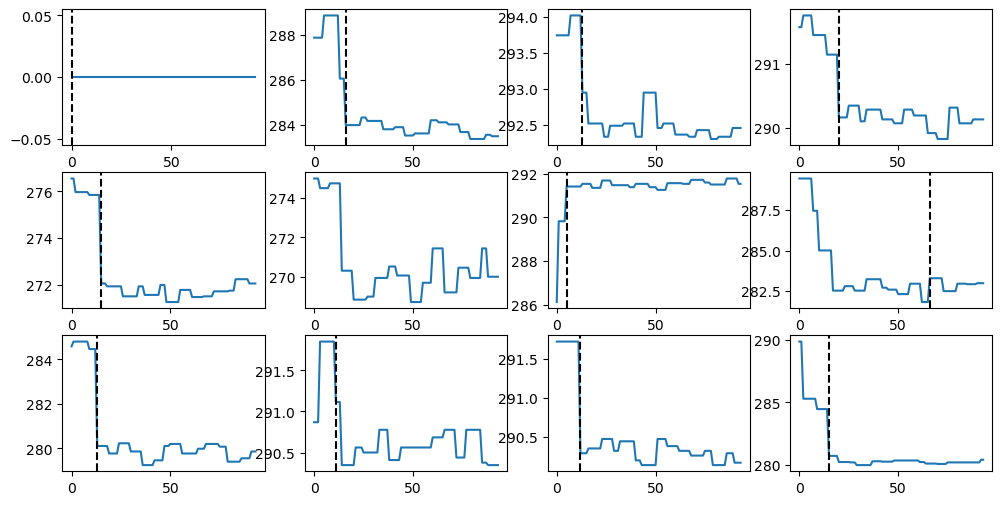

In [8]:
t = 0.5
t_d = 0.3
delta_t = 0.75
indices = np.arange(0, 12)

p1 = 'Voltage_Ax1_[V]'
p2 = 'Voltage_Ax2_[V]'
p3 = 'Voltage_Ax3_[V]'
p4 = 'Actual_pressure_[mTorr]'

params = [p3]

demo_oracle(t, t_d, delta_t, params, indices)

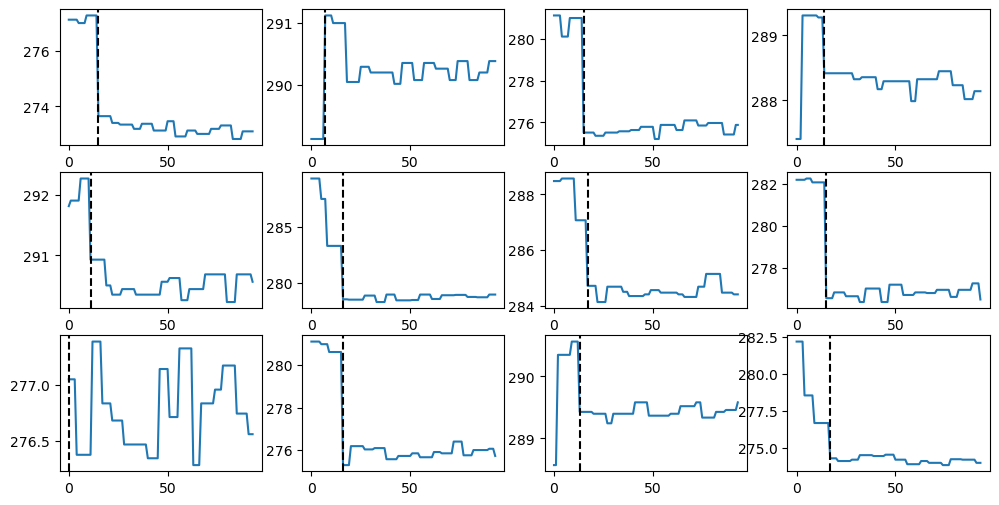

In [9]:
indices = np.arange(12, 24)
demo_oracle(t, t_d, delta_t, params, indices)

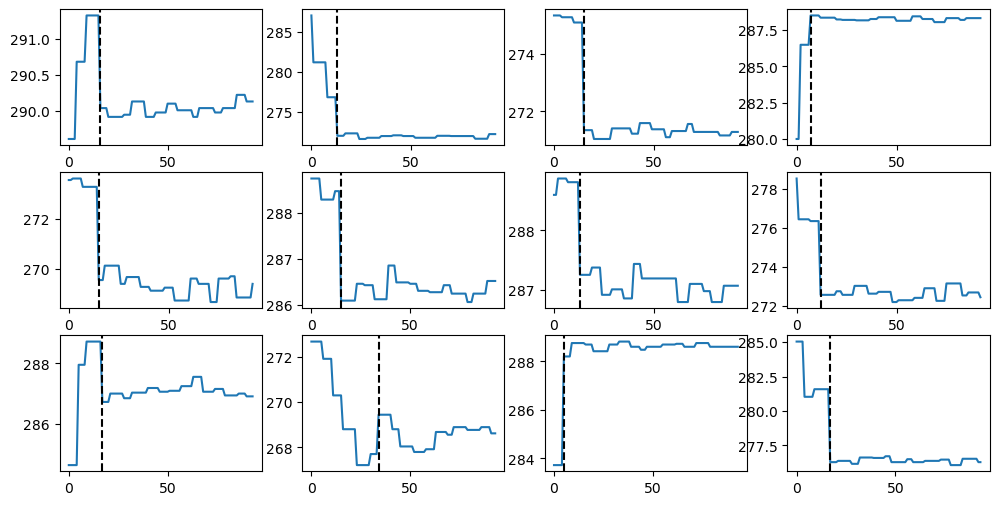

In [10]:
indices = np.arange(24, 36)
demo_oracle(t, t_d, delta_t, params, indices)

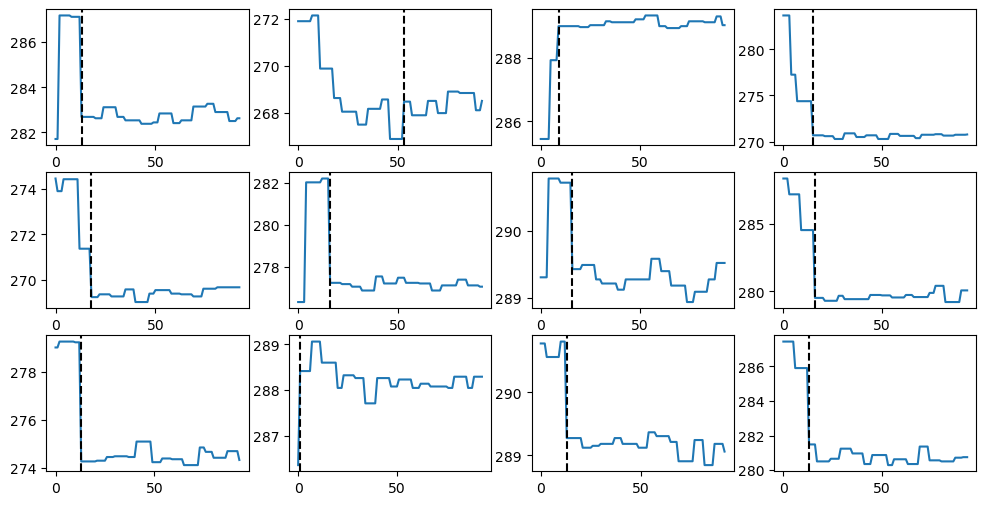

In [11]:
indices = np.arange(36, 48)
demo_oracle(t, t_d, delta_t, params, indices)

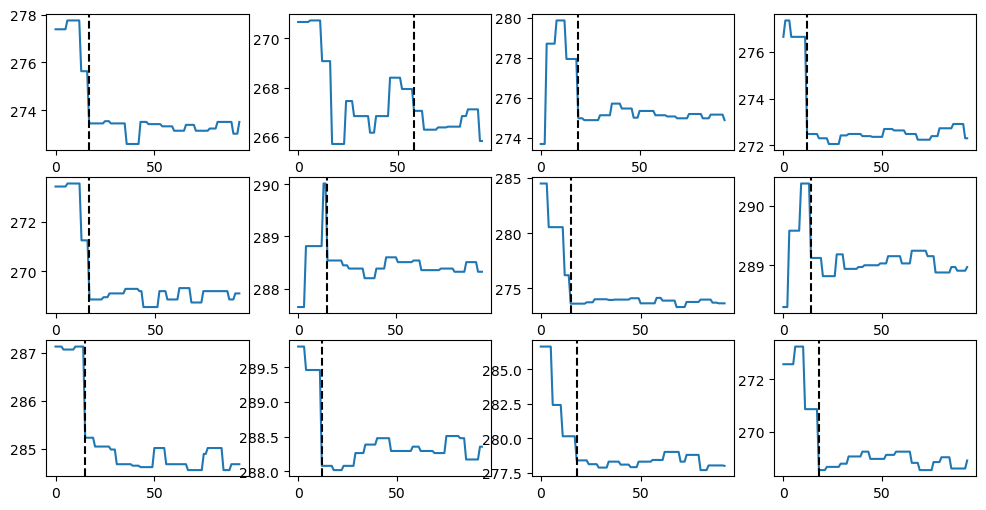

In [12]:
indices = np.arange(48, 60)
demo_oracle(t, t_d, delta_t, params, indices)

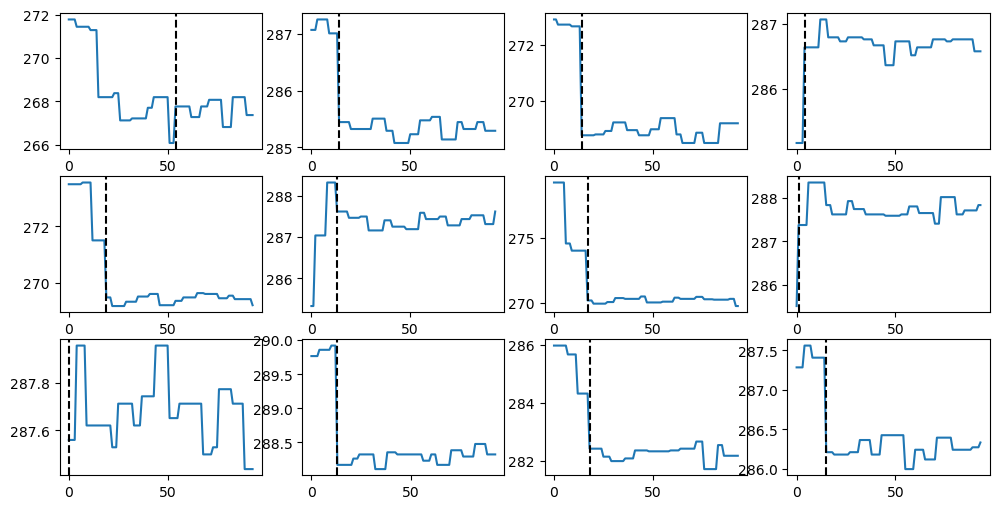

In [13]:
indices = np.arange(60, 72)
demo_oracle(t, t_d, delta_t, params, indices)

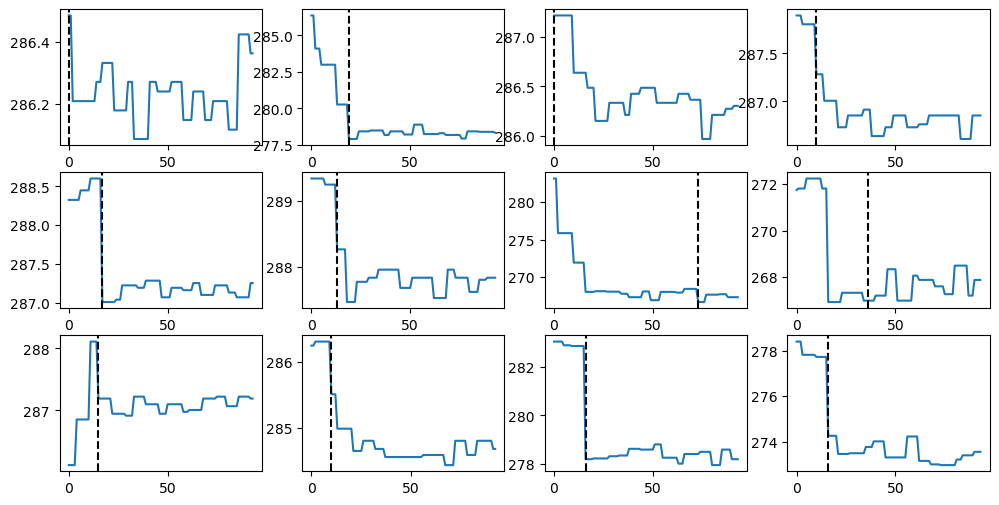

In [14]:
indices = np.arange(72, 84)
demo_oracle(t, t_d, delta_t, params, indices)

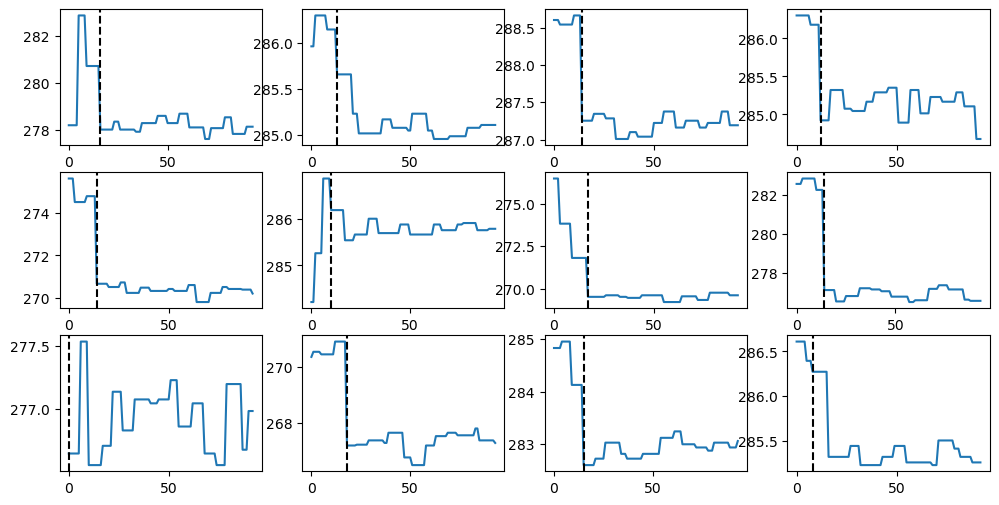

In [15]:
indices = np.arange(84, 96)
demo_oracle(t, t_d, delta_t, params, indices)

# Experiments (Ignore)

In [16]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [17]:
t = 0.5
t_d = 0.3
delta_t = 1

#p1 = 'Voltage_Ax1_[V]'
#p2 = 'Voltage_Ax2_[V]'
p3 = 'Voltage_Ax3_[V]'

#params = [p1,p2,p3]
params = [p3]

In [18]:
model=IsolationForest(n_estimators=5, max_samples='auto', contamination=float(0.07),max_features=1.0)

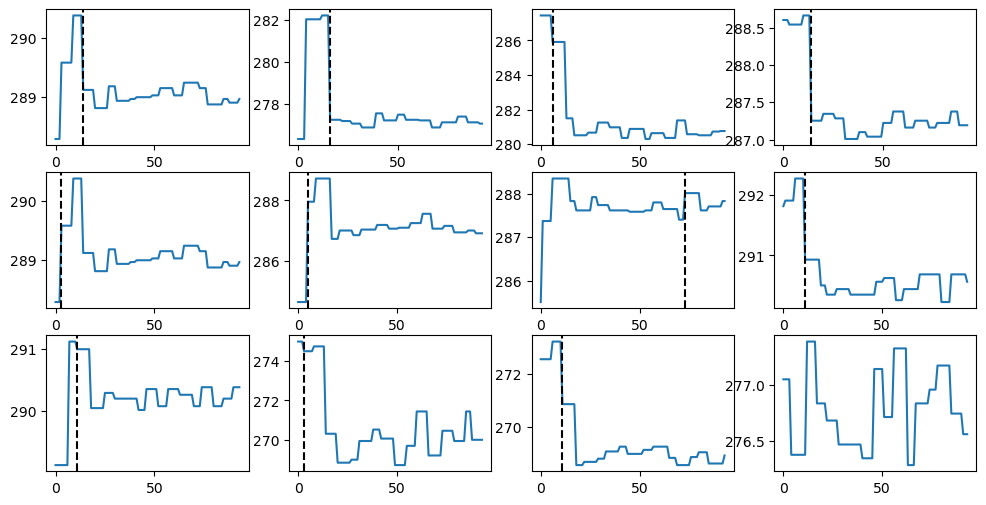

In [19]:
plt.rcParams['figure.figsize'] = [12, 6]
fig = plt.figure()
fig.tight_layout()

# Pick 12 random experiments
indices = np.random.randint(low=0, high=96, size=12, dtype=int)

for i in range(len(indices)):
     
    experiment = pd.json_normalize(data[indices[i]])
    
    df = pd.DataFrame({
        #p1 : experiment[p1].values[0],
        #p2 : experiment[p2].values[0],
        p3 : experiment[p3].values[0]
    })
    
    rows = len(df.axes[0])
    cols = len(df.axes[1])

    # Find steady state threshold as index
    n_t = int(t*rows)

    # Find steady state drag threshold as index
    n_td = int(t_d*rows)

    # Plot voltages
    xs = df.index
    #ys1 = df[p1]
    #ys2 = df[p2]
    ys3 = df[p3]

    plt.subplot(3, 4, i+1)
    #plt.plot(xs,ys1)
    #plt.plot(xs,ys2)
    plt.plot(xs,ys3)
    
    
    

    model.fit(df[[p3]])
    df['anomaly'] = model.predict(df[[p3]])
    
    for j in range(0, n_t + n_td):
        if all(df['anomaly'].tail(rows-j) == 1):
            plt.axvline(x = j, color='black', linestyle='dashed')
            break
    #plt.axvline(x = j, color='black', linestyle='dashed')
        

plt.show()

In [20]:
from adtk.data import validate_series
from adtk.detector import SeasonalAD
from sklearn.ensemble import IsolationForest

In [21]:
#s = validate_series(series)
#model = LevelShiftAD(c=1, side='both',window = 5)            
#anomalies = model.fit_detect(s)

In [22]:
seasonal_ad = SeasonalAD()

Exception: Could not find significant seasonality.

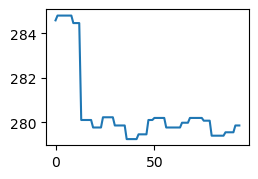

In [23]:
plt.rcParams['figure.figsize'] = [12, 6]
fig = plt.figure()
fig.tight_layout()

# Pick 12 random experiments
indices = np.random.randint(low=0, high=96, size=12, dtype=int)

for i in range(len(indices)):
     
    experiment = pd.json_normalize(data[indices[i]])
    
    df = pd.DataFrame({
        #p1 : experiment[p1].values[0],
        #p2 : experiment[p2].values[0],
        p3 : experiment[p3].values[0]
    })
    
    rows = len(df.axes[0])
    cols = len(df.axes[1])

    # Find steady state threshold as index
    n_t = int(t*rows)

    # Find steady state drag threshold as index
    n_td = int(t_d*rows)

    # Plot voltages
    xs = df.index
    #ys1 = df[p1]
    #ys2 = df[p2]
    ys3 = df[p3]

    plt.subplot(3, 4, i+1)
    #plt.plot(xs,ys1)
    #plt.plot(xs,ys2)
    plt.plot(xs,ys3)
    

    #model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)          
    #model.fit(df[[p3]])
    df.index = pd.to_datetime(df.index)
    df['anomaly']=anomalies = seasonal_ad.fit_detect(df[[p3]])
    
    for j in range(0, n_t + n_td):
        if df.iloc[j, 1] == -1:
            plt.axvline(x = j, color='black', linestyle='dashed')
            
    #plt.axvline(x = j, color='black', linestyle='dashed')
        

plt.show()